In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [3]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [6]:
df.drop(columns = ['Year', 'Status', 'Country'], inplace = True)

In [7]:
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
#df = pd.get_dummies(df, columns = ['Country'])

In [9]:
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
df.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


<AxesSubplot:xlabel='Adult Mortality', ylabel='Alcohol'>

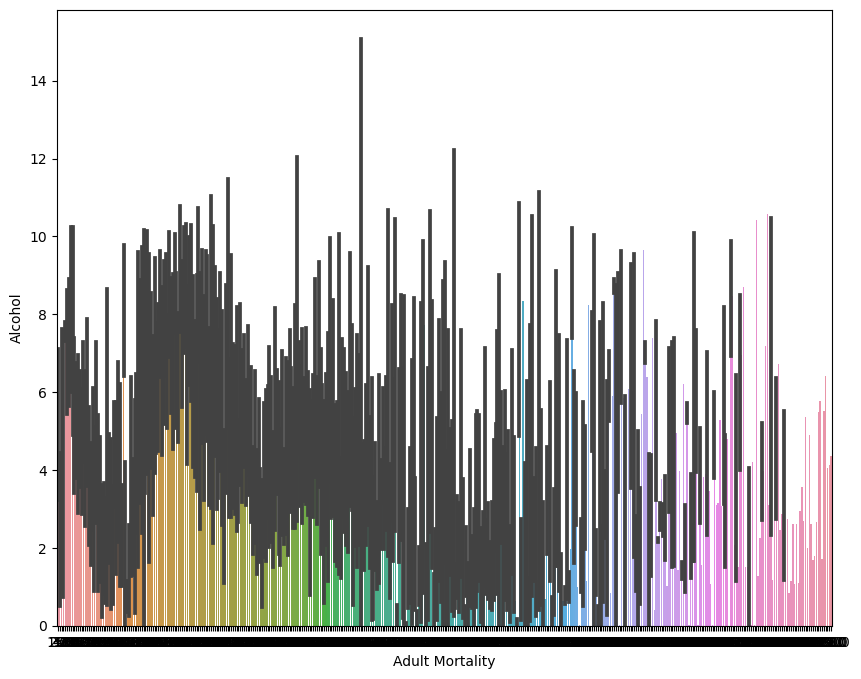

In [11]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Adult Mortality',y = 'Alcohol', data = df)

<AxesSubplot:xlabel='Alcohol'>

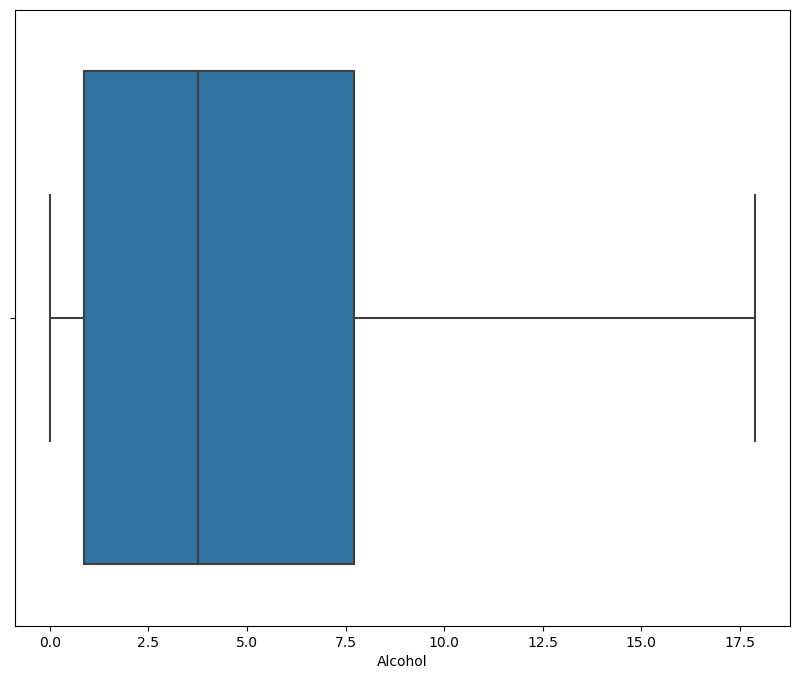

In [12]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Alcohol', data = df)

In [13]:
y= df["Life expectancy "]
X=  df.drop(["Life expectancy "], axis=1)

In [14]:
y.fillna(y.median(), inplace=True)
X.fillna(X.mean(), inplace=True)

In [15]:
sc = StandardScaler()

In [16]:
X = sc.fit_transform(X)

In [17]:
X

array([[ 0.79158632,  0.26882378, -1.1729584 , ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 0.85607167,  0.28578638, -1.1729584 , ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 0.83188966,  0.30274898, -1.1729584 , ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-0.73994077, -0.04498439, -0.04414645, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [ 4.20124926, -0.04498439, -0.73624609, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [ 4.03197521, -0.05346569, -0.74646158, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
lg = LogisticRegression()
svr = SVR()
RF = RandomForestRegressor()
GB = GradientBoostingRegressor()
DT = DecisionTreeRegressor()
XG = XGBRegressor()

In [20]:
#lg.fit(X_train, y_train)
svr.fit(X_train, y_train)
RF.fit(X_train, y_train)
GB.fit(X_train, y_train)
DT.fit(X_train, y_train)
XG.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [21]:
y_pred_svr = svr.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GB = GB.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_XG = XG.predict(X_test)

In [22]:
train_accuracy_svr = svr.score(X_train, y_train)
test_accuracy_svr = svr.score(X_test, y_test)

In [23]:
print('train_accuracy_svr', train_accuracy_svr)
print('test_accuracy_svr', test_accuracy_svr)

train_accuracy_svr 0.867213869764807
test_accuracy_svr 0.8741068502028092


In [24]:
train_accuracy_RF = RF.score(X_train, y_train)
test_accuracy_RF = RF.score(X_test, y_test)

In [25]:
print('train_accuracy_RF', train_accuracy_RF)
print('test_accuracy_RF', test_accuracy_RF)

train_accuracy_RF 0.9944799931526318
test_accuracy_RF 0.9678515542103545


In [26]:
train_accuracy_GB = GB.score(X_train, y_train)
test_accuracy_GB = GB.score(X_test, y_test)

In [27]:
print('train_accuracy_GB', train_accuracy_GB)
print('test_accuracy_GB', test_accuracy_GB)

train_accuracy_GB 0.960274138117625
test_accuracy_GB 0.9497737040574451


In [28]:
train_accuracy_DT = DT.score(X_train, y_train)
test_accuracy_DT = DT.score(X_test, y_test)

In [29]:
print('train_accuracy_DT', train_accuracy_DT)
print('test_accuracy_DT', test_accuracy_DT)

train_accuracy_DT 1.0
test_accuracy_DT 0.9264705691883861


In [30]:
train_accuracy_XG = XG.score(X_train, y_train)
test_accuracy_XG = XG.score(X_test, y_test)

In [31]:
print('train_accuracy_XG', train_accuracy_XG)
print('test_accuracy_XG', test_accuracy_XG)

train_accuracy_XG 0.9986822323506954
test_accuracy_XG 0.9583070043137623


In [32]:
#Here Random forest got high scoring with training and testing 

In [33]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
MAE = mean_absolute_error(y_test, y_pred_RF)
MSE = mean_squared_error(y_test, y_pred_RF)

In [34]:
print('mean_absolute_error:', MAE)
print('mean_squared_error:', MSE)

mean_absolute_error: 1.0784999999999987
mean_squared_error: 2.786221095238091


In [35]:
new_data = X

In [36]:
prediction = RF.predict(new_data)

In [37]:
prediction

array([64.229, 59.869, 59.885, ..., 45.987, 45.288, 45.053])